In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# Import csv file and put the data in data variable name
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding = 'unicode_escape')

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/tmp/ipython-input-54-500012411.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MonthlyCharges_bin')['Churn'].mean().plot(kind='bar', color=sns.color_palette('Set2'))


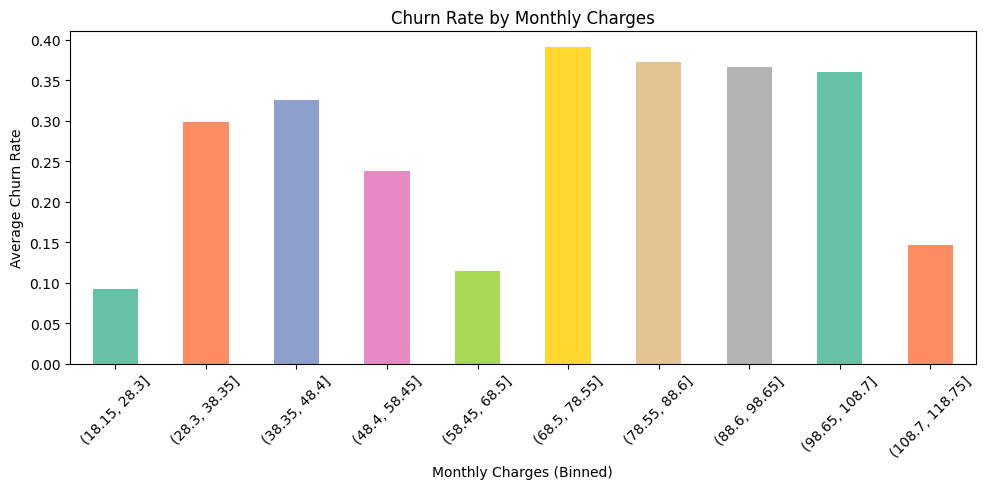

In [54]:
# Convert Churn to numeric (if not already done)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Bin MonthlyCharges to reduce clutter in the bar plot
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=10)

# Plotting average churn rate per MonthlyCharges bin
plt.figure(figsize=(10, 5))
df.groupby('MonthlyCharges_bin')['Churn'].mean().plot(kind='bar', color=sns.color_palette('Set2'))

plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Average Churn Rate')
plt.title('Churn Rate by Monthly Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: >

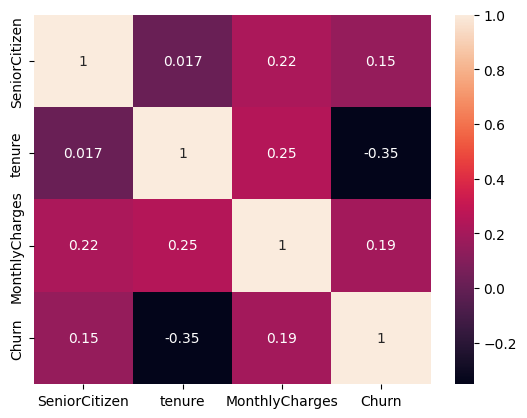

In [55]:
sns.heatmap(df.corr(numeric_only= True),annot=True)


In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyCharges_bin'],
      dtype='object')

Training Accuracy = 0.7573333333333333
Test Accuracy     = 0.7427149964463398
Precision         = 0.5102739726027398
Recall            = 0.7967914438502673
F1 Score          = 0.6221294363256785
ROC AUC Score     = 0.8332772517613928
Confusion Matrix:
 [[747 286]
 [ 76 298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



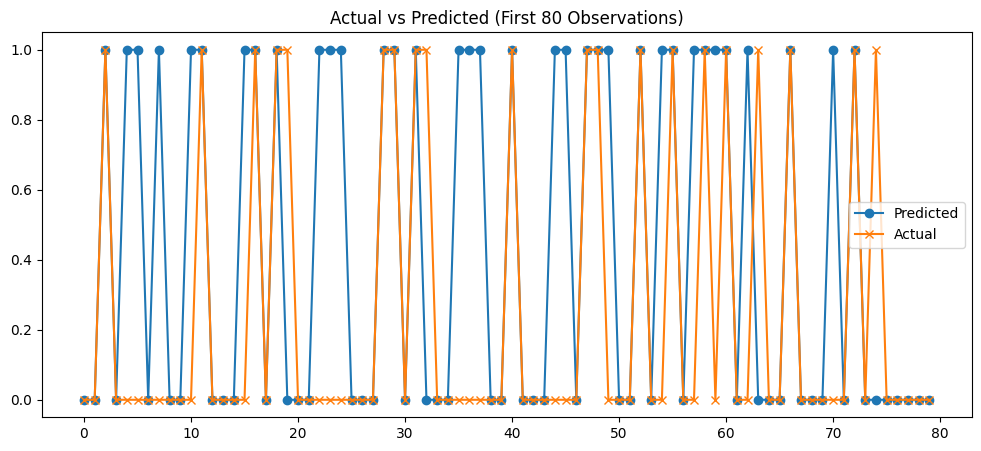

In [57]:

# Drop ID column and fix TotalCharges
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# One-hot encode categorical features
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Improved Logistic Regression
model = LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced')

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Scores
print("Training Accuracy =", model.score(X_train, y_train))
print("Test Accuracy     =", accuracy_score(y_test, y_pred))
print("Precision         =", precision_score(y_test, y_pred))
print("Recall            =", recall_score(y_test, y_pred))
print("F1 Score          =", f1_score(y_test, y_pred))
print("ROC AUC Score     =", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_pred[:80], label='Predicted', marker='o')
plt.plot(np.array(y_test[:80]), label='Actual', marker='x')
plt.title('Actual vs Predicted (First 80 Observations)')
plt.legend()
plt.show()


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              7032 non-null   object  
 1   SeniorCitizen       7032 non-null   int64   
 2   Partner             7032 non-null   object  
 3   Dependents          7032 non-null   object  
 4   tenure              7032 non-null   int64   
 5   PhoneService        7032 non-null   object  
 6   MultipleLines       7032 non-null   object  
 7   InternetService     7032 non-null   object  
 8   OnlineSecurity      7032 non-null   object  
 9   OnlineBackup        7032 non-null   object  
 10  DeviceProtection    7032 non-null   object  
 11  TechSupport         7032 non-null   object  
 12  StreamingTV         7032 non-null   object  
 13  StreamingMovies     7032 non-null   object  
 14  Contract            7032 non-null   object  
 15  PaperlessBilling    7032 non-null   object 

Training Accuracy = 0.7861333333333334
Test Accuracy     = 0.8059701492537313
Precision         = 0.6666666666666666
Recall            = 0.4748603351955307
F1 Score          = 0.5546492659053833
ROC AUC Score     = 0.8295050886452114
Confusion Matrix:
 [[964  85]
 [188 170]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1049
           1       0.67      0.47      0.55       358

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.81      0.79      1407



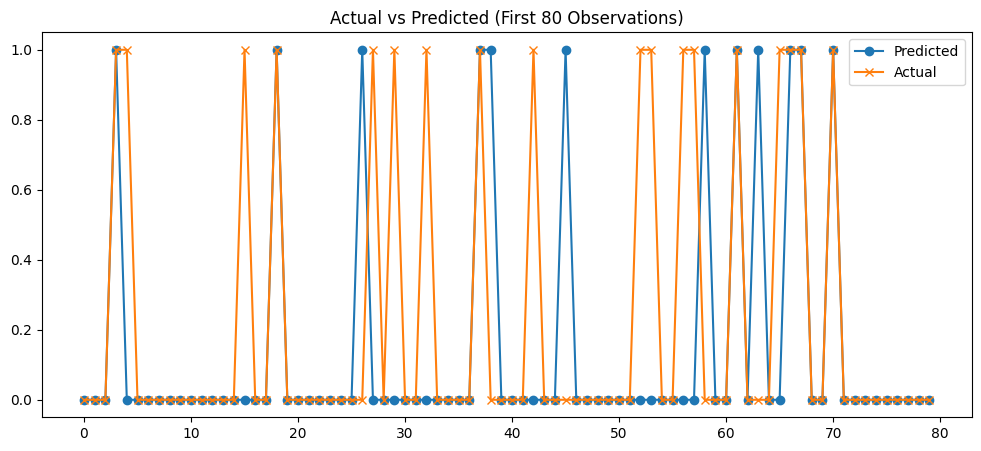

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop ID and fix TotalCharges
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Separate features and target
X = df[['MonthlyCharges','SeniorCitizen','tenure']]
y = df['Churn']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Polynomial features of degree 2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=90)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print metrics
print("Training Accuracy =", model.score(X_train, y_train))
print("Test Accuracy     =", accuracy_score(y_test, y_pred))
print("Precision         =", precision_score(y_test, y_pred))
print("Recall            =", recall_score(y_test, y_pred))
print("F1 Score          =", f1_score(y_test, y_pred))
print("ROC AUC Score     =", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Actual vs Predicted (first 80 samples)
plt.figure(figsize=(12, 5))
plt.plot(y_pred[:80], label='Predicted', marker='o')
plt.plot(np.array(y_test[:80]), label='Actual', marker='x')
plt.title('Actual vs Predicted (First 80 Observations)')
plt.legend()
plt.show()


Training Accuracy = 0.8115555555555556
Test Accuracy     = 0.8109452736318408
Precision         = 0.6503267973856209
Recall            = 0.5558659217877095
F1 Score          = 0.5993975903614458
ROC AUC Score     = 0.8486400988438044
Confusion Matrix:
 [[942 107]
 [159 199]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1049
           1       0.65      0.56      0.60       358

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



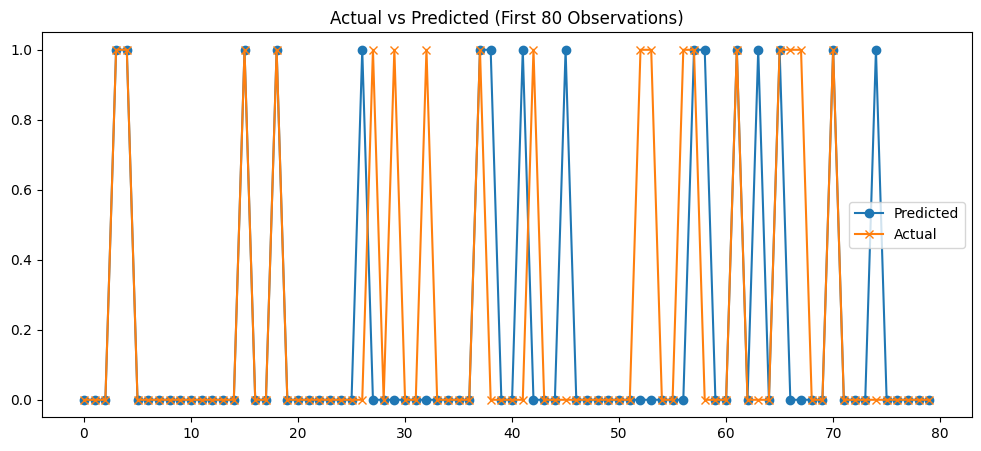

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop ID and fix TotalCharges
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Polynomial features of degree 2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=90)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print metrics
print("Training Accuracy =", model.score(X_train, y_train))
print("Test Accuracy     =", accuracy_score(y_test, y_pred))
print("Precision         =", precision_score(y_test, y_pred))
print("Recall            =", recall_score(y_test, y_pred))
print("F1 Score          =", f1_score(y_test, y_pred))
print("ROC AUC Score     =", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Actual vs Predicted (first 80 samples)
plt.figure(figsize=(12, 5))
plt.plot(y_pred[:80], label='Predicted', marker='o')
plt.plot(np.array(y_test[:80]), label='Actual', marker='x')
plt.title('Actual vs Predicted (First 80 Observations)')
plt.legend()
plt.show()
